<a href="https://colab.research.google.com/github/Nov05/Google-Colaboratory/blob/master/20230925_google_foobar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **\<TOP>**  

👉 https://foobar.withgoogle.com/#  

```
Mounting /home/***...
Welcome to foobar version 20230817-beta (2023-11-07T15:43:40.976148)
```

Level 1~3: https://blog.finxter.com/googles-foobar/ ([evernote](https://www.evernote.com/shard/s139/u/0/sh/5cf33457-e862-43ea-a65d-3e30006c63a8/UGyH9HkcrPwY7F3ysOl2qL0o07_p_Cxq49uGGz1BGuCklOG8ksHmkWLTGg))  

# **constraints**  
foobar:~/please-pass-the-coded-messages ***$ cat constraints.txt
Python
======
Your code will run inside a Python 2.7.13 sandbox. All tests will be run by calling the solution() function.

Standard libraries are supported except for bz2, crypt, fcntl, mmap, pwd, pyexpat, select, signal, termios, thread, time, unicodedata, zipimport, zlib.

Input/output operations are not allowed.

Your solution must be under 32000 characters in length including new lines and other non-printing characters.foobar:~/  

# **1. re-id**  

foobar:~/re-id ***$ cat readme.txt

Re-ID
=====

There's some unrest in the minion ranks: minions with ID numbers like "1", "42", and other "good" numbers have been lording it over the poor minions who are stuck with more boring IDs. To quell the unrest, Commander Lambda has tasked you with reassigning everyone new random IDs based on a Completely Foolproof Scheme. Commander Lambda has concatenated the prime numbers in a single long string: "2357111317192329...". Now every minion must draw a number from a hat. That number is the starting index in that string of primes, and the minion's new ID number will be the next five digits in the string. So if a minion draws "3", their ID number will be "71113". Help the Commander assign these IDs by writing a function **solution(n)** which takes in the starting index n of Lambda's string of all primes, and returns the next five digits in the string. Commander Lambda has a lot of minions, so the value of n will always be **between 0 and 10000**.

```
-- Python cases --
Input:solution.solution(0)Output:    23571
Input:solution.solution(3)Output:    71113
```  

In [ ]:
## alright. let's find the range first
import sympy
primes, p_len = [2], 1
p_count = len(primes)
for power in range(1, 20):
    p_len_old = p_len
    p_count_old = p_count
    if primes[-1]>=10**power:
        continue
    for num in range(primes[-1]+1, 10**power):
        if sympy.isprime(num):
            primes.append(num)
            p_len += len(str(num))
        if p_len>10000+5:
            break
    p_count = len(primes)
    if p_len_old<10000+5 and p_len>=10000+5:
        print(f"power: {power}")
        break
print("prime count (old):", p_count_old, ", string length (old):", p_len_old)
print("prime count:", p_count, ", string length:", p_len)
print("the last prime of the string:", primes[-1])

power: 5
prime count (old): 1229 , string length (old): 4719
prime count: 2287 , string length: 10009
the last prime of the string: 20231


In [ ]:
sympy.isprime(1) ## i know...

False

In [ ]:
import sympy
def solution(i):
    p_str, p_len = '2', 1 ## the string, and prime numbers start from 2
    for num in range(3, 20232):
        if sympy.isprime(num):
            p_str += str(num)
            p_len += len(str(num))
        if p_len >= i+5:
            print(num, f"{p_len}>={i+5}")
            break
    print(len(p_str))
    print(p_str)
    return p_str[i:i+5]

print(solution(10000))

20231 10009>=10005
10009
235711131719232931374143475359616771737983899710110310710911312713113713914915115716316717317918119119319719921122322722923323924125125726326927127728128329330731131331733133734734935335936737337938338939740140941942143143343944344945746146346747948749149950350952152354154755756356957157758759359960160761361761963164164364765365966167367768369170170971972773373974375175776176977378779780981182182382782983985385785986387788188388790791191992993794194795396797197798399199710091013101910211031103310391049105110611063106910871091109310971103110911171123112911511153116311711181118711931201121312171223122912311237124912591277127912831289129112971301130313071319132113271361136713731381139914091423142714291433143914471451145314591471148114831487148914931499151115231531154315491553155915671571157915831597160116071609161316191621162716371657166316671669169316971699170917211723173317411747175317591777178317871789180118111823183118471861186718711873187718791889190119071913

In [ ]:
import sympy
def solution(i):
    p_str, p_len = '2', 1 ## prime numbers start from 2
    for num in range(3, 20232):
        if sympy.isprime(num):
            p_str += str(num)
            p_len += len(str(num))
        if p_len >= i+5:
            break
    return p_str[i:i+5]
print(solution(10000))

02192


https://stackoverflow.com/questions/46853104/can-this-solution-to-the-google-foobar-re-id-be-more-efficient  

In [ ]:
%%time
## brute force...
def solution(i):
    p_str, p_len = '23', 2 ## prime numbers start from 2
    for num in range(3, 20232, 2): ## all even numbers are not primes
        for j in range(3, num):
            if (num % j) == 0: ## has a factor that is either 1 or itself
                break
            elif len(p_str) >= 10005: ## the prime string is long enough
                break
            elif j == num-1:
                p_str += str(num)
                break
            else:
                continue
    return p_str[i:i+5]
print(solution(10000))

02192
CPU times: user 6.32 s, sys: 0 ns, total: 6.32 s
Wall time: 6.43 s


In [ ]:
%%time
## brute force with a little improvement...
def solution(i):
    p_str, p_len = '23', 2 ## prime numbers start from 2
    for num in range(3, 20232, 2): ## all even numbers are not primes
        for j in range(3, num):
            if (num % j) == 0: ## has a factor that is either 1 or itself
                break
            if j == num-1:
                p_str += str(num)
                p_len += len(str(num))
        if len(p_str) >= 10005:
            break
    return p_str[i:i+5]
print(solution(10000))

02192
CPU times: user 3.04 s, sys: 0 ns, total: 3.04 s
Wall time: 3.06 s


In [ ]:
%%time
## probably the "right" solution
def solution(i):
    def sieve_of_eratosthenes(n):
        """Returns a list of prime numbers up to n."""
        primes_str = ''
        is_prime = [True] * (n+1)
        for i in range(2, n+1):
            if is_prime[i]:
                primes_str += str(i)
            for j in range(i*i, n+1, i):
                is_prime[j] = False
        return primes_str

    p_str = sieve_of_eratosthenes(20232)
    return p_str[i:i+5]

print(solution(10000)) ## remove prints for submission

02192
CPU times: user 14.2 ms, sys: 0 ns, total: 14.2 ms
Wall time: 15.1 ms


```
foobar:~/re-id ***$ cat constrains.txt  
cat: constrains.txt: No such file or directory  
foobar:~/re-id ***$ cat constraints.txt  
Java  
====  
Your code will be compiled using standard Java 8. All tests will be run
by calling the solution() method inside the Solution class

Execution time is limited.

Wildcard imports and some specific classes are restricted (e.g. java.
lang.ClassLoader). You will receive an error when you verify your
solution if you have used a restricted class.

Third-party libraries, input/output operations, spawning threads or
processes and changes to the execution environment are not allowed.

Your solution must be under 32000 characters in length including new
lines and other non-printing characters.

Python  
======  
Your code will run inside a Python 2.7.13 sandbox. All tests will be
run by calling the solution() function.

Standard libraries are supported except for bz2, crypt, fcntl, mmap, pwd, pyexpat, select, signal, termios, thread, time, unicodedata,
zipimport, zlib.

Input/output operations are not allowed.

Your solution must be under 32000 characters in length including new
lines and other non-printing characters.
```

# **2.1. please-pass-the-coded-messages**  

foobar:~/please-pass-the-coded-messages ***$ cat readme.txt
Please Pass the Coded Messages
==============================
You need to pass a message to the bunny workers, but to avoid detection, the code you agreed to use is... obscure, to say the least. The bunnies are given food on standard-issue plates that are stamped with the numbers 0-9 for easier sorting, and you need to combine sets of plates to create the numbers in the code. The signal that a number is part of the code is that it is divisible by 3. You can do smaller numbers like 15 and 45 easily, but bigger numbers like 144 and 414 are a little trickier. Write a program to help yourself quickly create large numbers for use in the code, given a limited number of plates to work with.

You have L, a list containing some digits (0 to 9). Write a function solution(L) which finds the largest number that can be made from some or all of these digits and is divisible by 3. If it is not possible to make such a number, return 0 as the solution. L will contain anywhere from 1 to 9 digits. The same digit may appear multiple times in the list, but each element in the list may only be used once.

```
-- Python cases --
Input:
solution.solution([3, 1, 4, 1])
Output:
    4311

Input:
solution.solution([3, 1, 4, 1, 5, 9])
Output:
    94311
```

In [ ]:
ns = []
for i in range(10):
    ns.append(i*3)
print(ns)
print([str(n)[-1] for n in ns])

[0, 3, 6, 9, 12, 15, 18, 21, 24, 27]
['0', '3', '6', '9', '2', '5', '8', '1', '4', '7']


https://stackoverflow.com/questions/33343528/permutations-in-python-without-libraries  

In [ ]:
def permutations(l):
    if len(l) == 1:
        return [l]
    return [[l[i]]+p for i in range(len(l)) for p in permutations(l[:i] + l[i+1:])]
print(permutations([3,2,1]))

[[3, 2, 1], [3, 1, 2], [2, 3, 1], [2, 1, 3], [1, 3, 2], [1, 2, 3]]


In [ ]:
def permutations(l):
    ps = []
    length = len(l)
    if length==1: return [l]
    for i in range(length):
        for p in permutations(l[:i]+l[i+1:]):
            ps += [[l[i]]+p]
    return ps
permutations([3,2,1])

[[3, 2, 1], [3, 1, 2], [2, 3, 1], [2, 1, 3], [1, 3, 2], [1, 2, 3]]

https://stackoverflow.com/questions/1482308/how-to-get-all-subsets-of-a-set-powerset  

In [ ]:
def powerset(l):
    ps = []
    length = len(l)
    for i in range(1<<length, 0, -1):
        comb = [l[j] for j in range(length) if (i & (1<<j))]
        ps += [[len(comb), comb]]
    ps.sort(reverse=True)
    return ps
powerset([3,2,1])

[[3, [3, 2, 1]],
 [2, [3, 2]],
 [2, [3, 1]],
 [2, [2, 1]],
 [1, [3]],
 [1, [2]],
 [1, [1]],
 [0, []]]

In [ ]:
## code explain
print(bin(1<<3))
print(int(0b1000))

0b1000
8


In [ ]:
# failed test 3 in google foobar
def solution1(l):
    def powerset(l):
        if not l: return []
        ps = []
        length = len(l)
        for i in range(1<<length, 0, -1):
            comb = [l[j] for j in range(length) if (i & (1<<j))]
            if sum(comb)%3==0:
                ps += [[len(comb), comb]]
        ps.sort(reverse=True)
        return ps

    ps = powerset(l)
    for _,p in ps:
        num = 0
        p.sort(reverse=True)
        for digit,power in zip(p, range(len(p)-1,-1,-1)):
            num += digit * 10**power
        return num
    return 0
solution1([3, 1, 4, 1])

4311

In [ ]:
## test 3 failed...
def solution2(l):
    def powerset(indices, length):
        if not indices: return []
        ps_indices = []
        for i in range(1<<length, 0, -1):
            comb = [indices[j] for j in indices if (i & (1<<j))]
            ps_indices += [[len(comb), comb]]
        ps_indices.sort(reverse=True)
        return ps_indices

    if not l: return 0
    length = len(l)
    ps_indices = powerset(list(range(length)), length)
    for _,indices in ps_indices:
        s = [l[idx] for idx in indices]
        if sum(s)%3==0:
            s.sort(reverse=True)
            num = 0
            for digit,power in zip(s, range(len(s)-1,-1,-1)):
                num += digit * 10**power
            return num
    return 0
solution2([3, 1, 4, 1])

4311

In [ ]:
## test 3 failed...
def solution3(l):
    from itertools import combinations
    def get_powerset(s, n):
        powerset = []
        for r in range(1, n+1):
            for comb in (combinations(s, r)):
                powerset += [[len(comb), list(comb)]]
        powerset.sort(reverse=True)
        return powerset

    if not l: return 0
    length = len(l)
    ps_indices = get_powerset(list(range(length)), length)
    for _,indices in ps_indices:
        s = [l[idx] for idx in indices]
        if sum(s)%3==0:
            s.sort(reverse=True)
            num = 0
            for digit,power in zip(s, range(len(s)-1,-1,-1)):
                num += digit * 10**power
            return num
    return 0
solution3([3, 1, 4, 1])

4311

In [ ]:
## test 3 failed...
def solution4(l):
    from itertools import combinations
    def get_powerset(s, n):
        powerset = []
        for r in range(1, n+1):
            for comb in (combinations(s, r)):
                yield comb

    if not l: return 0
    length = len(l)
    set_generator = get_powerset(list(range(length)), length)
    longest, largest = 0, 0
    for s in set_generator:
        current_length = len(s)
        if current_length>=longest:
            s = [l[idx] for idx in s]
            if sum(s)%3==0:
                s.sort(reverse=True)
                num = 0
                for digit,power in zip(s, range(len(s)-1,-1,-1)):
                    num += digit * 10**power
                if num>largest:
                    largest = num
    return largest
solution4([3, 1, 4, 1])

4311

In [ ]:
from itertools import combinations
def _all_combos(s):
    n = len(s)
    powerset = []
    for r in range(1, n+1):
        for comb in (combinations(s, r)):
            powerset += [[len(comb), list(comb)]]
    powerset.sort(reverse=True)
    return powerset
_all_combos([3,2,1])

[[3, [3, 2, 1]],
 [2, [3, 2]],
 [2, [3, 1]],
 [2, [2, 1]],
 [1, [3]],
 [1, [2]],
 [1, [1]]]

In [ ]:
## all tests failed in google foobar...
def solution5(l):
    def powersets_generator(digits):
        if not digits:
            yield []
        else:
            first = digits.pop(0)
            for subset in powersets_generator(digits):
                yield [first, *subset]
                yield subset

    if not l: return 0
    result = 0
    for p in powersets_generator(l):
        if not sum(p)%3:
            p.sort(reverse=True)
            num = 0
            for digit,power in zip(p, range(len(p)-1,-1,-1)):
                num += digit * 10**power
            if num > result:
                result = num
    return result
print(solution5([3, 1, 4, 1]))
print(solution5([3, 1, 4, 1, 5, 9]))

4311
94311


In [ ]:
def _powersets_generator(digits):
    if not digits:
        yield []
    else:
        first = digits.pop(0)
        for subset in _powersets_generator(digits):
            yield [first, *subset]
            yield subset
for s in _powersets_generator([3,2,1]):
    print(s)

[3, 2, 1]
[2, 1]
[3, 1]
[1]
[3, 2]
[2]
[3]
[]


In [ ]:
## passed all 5 tests
def solution6(l):
    if not l: return 0
    x = find_largest_bucket(l)
    return find_max_number(x)

def find_largest_bucket(l):
    ## Are the digits in the list divisible?
    if sum(digit for digit in l)%3 == 0:
        return l
    ## Find all smaller buckets recursively
    buckets = []
    for digit in l:
        if digit not in {0, 3, 6, 9}:
            tmp = l[:]
            tmp.remove(digit)
            buckets.append(find_largest_bucket(tmp))
    largest_bucket = max(buckets, key=find_max_number)
    return largest_bucket

def find_max_number(l):
    ## Returns maximal number that can be generated from list.
    l_sorted = sorted(l, reverse=True)
    # number = ''.join(str(x) for x in l_sorted) ## test 4 failed
    # return int(number)
    num = 0
    for digit,power in zip(l_sorted, range(len(l_sorted)-1,-1,-1)):
        num += digit * 10**power
    return num
solution6([3, 1, 4, 1])

4311

In [ ]:
from time import time
ls =[
    [[3, 1, 4, 1], 4311],
    [[3, 1, 4, 1, 5, 9], 94311],
    [[], 0],
    [[1,1,1],  111],
    [[5,5], 0],
    [[5,5,5,5], 555],
    [[5,5,5,5,6], 6555],
    [[0,0,1], 0],
    [[0,1,1], 0],
    [[0,1,1,3], 30],
    [[0,0,0,0,0,0,0,0,0,0], 0],
    [None, 0],
    [[0,1,2,3,4,5,6,7,8,9], 9876543210],
]
for i in range(1, 7):
    func = globals()['solution'+str(i)]
    start_time = time()
    for _ in range(1000):
        for l,num in ls:
            num_ = func(l)
            # if num_!=num:
            #     print(f"{l}: expect {num}, got {num_}")
    end_time = time()
    print(f"{func} execution time: {end_time-start_time}")

<function solution1 at 0x7aaa8f818550> execution time: 7.3919360637664795
<function solution2 at 0x7aaac00ddf30> execution time: 6.869976997375488
<function solution3 at 0x7aaac0efa830> execution time: 2.0300796031951904
<function solution4 at 0x7aaac0efae60> execution time: 6.538036823272705
<function solution5 at 0x7aaa8f98ba30> execution time: 0.011954307556152344
<function solution6 at 0x7aaa8f727f40> execution time: 0.0023593902587890625


# **2.2. hey-i-already-did-that**  

foobar:~/hey-i-already-did-that ***$ cat readme.txt

Hey, I Already Did That!
========================

Commander Lambda uses an automated algorithm to assign minions randomly to tasks, in order to keep minions on their toes. But you've noticed a flaw in the algorithm -- it eventually loops back on itself, so that instead of assigning new minions as it iterates, it gets stuck in a cycle of values so that the same minions end up doing the same tasks over and over again. You think proving this to Commander Lambda will help you make a case for your next promotion. You have worked out that the algorithm has the following process:   

1) Start with a random minion ID n, which is a nonnegative integer of length k in base b  

2) Define x and y as integers of length k.  x has the digits of n in descending order, and y has the digits of n in ascending order  

3) Define z = x - y.  Add leading zeros to z to maintain length k if necessary  

4) Assign n = z to get the next minion ID, and go back to step 2  

For example, given minion ID n = 1211, k = 4, b = 10, then x = 2111, y = 1112 and z = 2111 - 1112 = 0999. Then the next minion ID will be n = 0999 and the algorithm iterates again: x = 9990, y = 0999 and z = 9990 - 0999 = 8991, and so on.  

Depending on the values of n, k (derived from n), and b, at some point the algorithm reaches a cycle, such as by reaching a constant value. For example, starting with n = 210022, k = 6, b = 3, the algorithm will reach the cycle of values [210111, 122221, 102212] and it will stay in this cycle no matter how many times it continues iterating. Starting with n = 1211, the routine will reach the integer 6174, and since 7641 - 1467 is 6174, it will stay as that value no matter how many times it iterates.  

Given a minion ID as a string n representing a nonnegative integer of length k in base b, where 2 <= k <= 9 and 2 <= b <= 10, write a function solution(n, b) which returns the length of the ending cycle of the algorithm above starting with n. For instance, in the example above, solution(210022, 3) would return 3, since iterating on 102212 would return to 210111 when done in base 3. If the algorithm reaches a constant, such as 0, then the length is 1.  

```
-- Python cases --
Input:solution.solution('1211', 10) Output:    1
Input:solution.solution('210022', 3) Output:    3
```

In [ ]:
## not useful here
from numpy import base_repr ## under 36
base_repr(222100, base=10)

'222100'

In [ ]:
n = '222100'
''.join(sorted(n))

'001222'

In [ ]:
def solution(n, b): ## n is string, b is int
    def x_minus_y_base_b(x, y, k, b): ## x >= y and both are strings
        diff = '' ## return a string
        carry = 0
        for i in range(-1, -k-1, -1):
            _x, _y = int(x[i]), int(y[i])
            if _x-carry<_y:
                digit = _x - carry + b - _y
                carry = 1
            else:
                digit = _x - carry - _y
                carry = 0
            diff = str(digit) + diff
        return diff

    k = len(n)
    _n, diff = n[1:]+n[0], None
    diffs = dict()
    count = 0
    while True:
        x = ''.join(sorted(_n, reverse=True))
        y = ''.join(sorted(_n))
        diff = x_minus_y_base_b(x, y, k, b)
        if diff in diffs:
            break
        else:
            diffs[diff] = count
            count += 1
            _n = diff[1:] + diff[0]
    return count - diffs[diff]

print(solution('1211', 10)) ## expect 1
print(solution('210022', 3)) ## 3

1
3


# **3.1. fuel-injection-perfection**    

foobar:~/fuel-injection-perfection ***$ cat readme.txt

Fuel Injection Perfection  
=========================

Commander Lambda has asked for your help to refine the automatic quantum antimatter fuel injection system for the LAMBCHOP doomsday device. It's a great chance for you to get a closer look at the LAMBCHOP -- and maybe sneak in a bit of sabotage while you're at it -- so you took the job gladly.   

Quantum antimatter fuel comes in small pellets, which is convenient since the many moving parts of the LAMBCHOP each need to be fed fuel one pellet at a time. However, minions dump pellets in bulk into the fuel intake. You need to figure out the most efficient way to sort and shift the pellets down to a single pellet at a time. The fuel control mechanisms have three operations:   

1) Add one fuel pellet  
2) Remove one fuel pellet  
3) Divide the entire group of fuel pellets by 2 (due to the destructive energy released when a quantum antimatter pellet is cut in half, the safety controls will only allow this to happen if there is an even number of pellets)  

Write a function called solution(n) which takes a positive integer as a string and returns the minimum number of operations needed to transform the number of pellets to 1. The fuel intake control panel can only display a number up to 309 digits long, so there won't ever be more pellets than you can express in that many digits.  

For example:  
solution(4) returns 2: 4 -> 2 -> 1  
solution(15) returns 5: 15 -> 16 -> 8 -> 4 -> 2 -> 1  

```
-- Python cases --
Input:solution.solution('15')Output:    5
Input:solution.solution('4')Output:    2

```



In [ ]:
## wrong understanding of the problem
def _solution(n):
    _n = int(n)
    power = 0
    while 2**power<_n:
        power += 1
    return min(2**(power+1)-_n, 2**power-_n) + power

print(solution(15)) ## expect 5
print(solution(4)) ## 2

5
2


In [ ]:
## passed test 1,2,8,9,10 of 10 tests
## i guess it is not fast enough
def solution(n):
    _n = int(n)
    nums = {1}
    s = 1
    count = 0
    while _n not in nums:
        count += 1
        _nums = list(nums)
        for num in _nums:
            nums.add(num+1)
            if num-1>=1:
                nums.add(num-1)
            if num*2<=_n*2:
                nums.add(num*2)
    print(nums)
    return count

print(solution(15)) ## expect 5
print(solution(4)) ## 2
print(solution(10))

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 24}
5
{1, 2, 3, 4}
2
{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 16}
4


In [ ]:
def solution(n):
    _n = int(n)
    count = 0
    while _n > 1:
        if _n&1==1: ## n is odd
            if _n%4==1 or _n==3:
                _n -= 1
            else:
                _n += 1
        else: ## n is even
            _n = _n >> 1
        count += 1
    return count
print(solution(15)) ## expect 5
print(solution(4)) ## 2
print(solution(10)) ## 4

5
2
4


# **3.2. prepare-the-bunnies-escape**  

Prepare the Bunnies' Escape
===========================
You're awfully close to destroying the LAMBCHOP doomsday device and freeing Commander Lambda's bunny workers, but once they're free of the work duties the bunnies are going to need to escape Lambda's space station via the escape pods as quickly as possible. Unfortunately, the halls of the space station are a maze of corridors and dead ends that will be a deathtrap for the escaping bunnies. Fortunately, Commander Lambda has put you in charge of a remodeling project that will give you the opportunity to make things a little easier for the bunnies. Unfortunately (again), you can't just remove all obstacles between the bunnies and the escape pods - at most you can remove one wall per escape pod path, both to maintain structural integrity of the station and to avoid arousing Commander Lambda's suspicions.

You have maps of parts of the space station, each starting at a work area exit and ending at the door to an escape pod. The map is represented as a matrix of 0s and 1s, where 0s are passable space and 1s are impassable walls. The door out of the station is at **the top left (0,0)** and the door into an escape pod is at **the bottom right (w-1,h-1)**.

Write a function solution(map) that generates the length of the shortest path from the station door to the escape pod, where you are allowed to remove one wall as part of your remodeling plans. The path length is the total number of nodes you pass through, counting both the entrance and exit nodes. The starting and ending positions are always passable (0). The map will always be solvable, though you may or may not need to remove a wall. The height and width of the map can be from 2 to 20. Moves can only be made in cardinal directions; no diagonal moves are allowed.  

```
-- Python cases --
Input:
solution.solution([
    [0, 0, 0, 0, 0, 0],
    [1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1],
    [0, 1, 1, 1, 1, 1],
    [0, 0, 0, 0, 0, 0]])
Output:
    11

Input:
solution.solution([
    [0, 1, 1, 0],
    [0, 0, 0, 1],
    [1, 1, 0, 0],
    [1, 1, 1, 0]])
Output:
    7
```

In [ ]:
## passed 1,2 of 5 tests
## took too much time or memory?
## pop(0) - BFS, pop(-1) - DFS
def solution(map):
    h, w = len(map), len(map[0])
    l = h * w
    paths = [(0, (0,0), {0})] ## (break_wall, fringe, [passed pods])
    shortest = l
    while paths:
        break_wall, (i,j), passed = paths.pop(-1)
        l = len(passed)
        if i==w-1 and j==h-1: ## exit the map
            print(passed)
            if l<shortest:
                shortest = l
            continue

        for i_new,j_new in [
            (i, j+1), ## move right
            (i+1, j), ## down
            (i, j-1), ## left
            (i-1, j), ## up
        ]:
            break_wall_new, passed_new = break_wall, passed.copy()
            next_pod = w*i_new + j_new
            if i_new>=0 and i_new<h \
            and j_new>=0 and j_new<w \
            and next_pod not in passed_new:
                if map[i_new][j_new]==1:
                    if not break_wall: ## break wall
                        break_wall_new = True
                    else:
                        continue
                passed_new.add(next_pod)
                paths.append((break_wall_new, (i_new,j_new), passed_new))
    return shortest

print(
solution([
    [0, 1, 1, 0],
    [0, 0, 0, 1],
    [1, 1, 0, 0],
    [1, 1, 1, 0]])
) ## expect 7

{0, 4, 5, 9, 10, 11, 15}
{0, 4, 5, 6, 10, 14, 15}
{0, 4, 5, 6, 10, 11, 15}
{0, 4, 5, 6, 7, 11, 15}
{0, 1, 5, 6, 10, 11, 15}
7


In [ ]:
## flood algorithm, all 5 tests passed
def solution(map):
    def flood(h, w, map):
        count = 1
        fringe, flooded = {(0,0)}, {(0,0)}
        while (h-1,w-1) not in fringe:
            fringe_new = set()
            for i,j in fringe:
                for i_new,j_new in [
                    (i, j+1), ## move right
                    (i+1, j), ## down
                    (i, j-1), ## left
                    (i-1, j), ## up
                ]:
                    if i_new>=0 and i_new<h \
                    and j_new>=0 and j_new<w \
                    and map[i_new][j_new]==0 \
                    and (i_new,j_new) not in flooded:
                        fringe_new.add((i_new, j_new))
            ## just in case there is no way to exit
            if (i!=h-1 or j!=w-1) and not fringe_new:
                return float('inf')
            count += 1
            fringe = fringe_new
            flooded.update(fringe_new)
        return count

    h, w = len(map), len(map[0])
    l = h * w
    shortest = l
    for i_ in range(h):
        for j_ in range(w):
            if map[i_][j_]==0:
                continue
            else: ## explore the map
                map[i_][j_] = 0 ## remove a wall
                count = flood(h, w, map)
                if count==h+w-1: return count ## early exit
                if count<shortest: shortest = count
                map[i_][j_] = 1 ## restore the wall
    count = flood(h, w, map) ## no removing any wall
    if count<shortest: shortest = count
    return shortest

print(
solution([
    [0, 1, 1, 0],
    [0, 0, 0, 1],
    [1, 1, 0, 0],
    [1, 1, 1, 0]])
) ## expect 7

7


In [ ]:
print(
solution([
    [0, 0, 0, 0, 0, 0],
    [1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1],
    [0, 1, 1, 1, 1, 1],
    [0, 0, 0, 0, 0, 0]])
) ## expect 11

print(
solution([
    [0, 0, 0, 0, 0],
    [1, 1, 1, 1, 0],
    [0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1],
    [0, 0, 0, 0, 0]])
) ## expect 9

11
9
7


# **3.3. bomb-baby**  

foobar:~/bomb-baby ***$ cat readme.txt  

Bomb, Baby!
===========
You're so close to destroying the LAMBCHOP doomsday device you can taste it! But in order to do so, you need to deploy special self-replicating bombs designed for you by the brightest scientists on Bunny Planet. There are two types: **Mach bombs (M)** and **Facula bombs (F)**. The bombs, once released into the LAMBCHOP's inner workings, will automatically deploy to all the strategic points you've identified and destroy them at the same time.

But there's a few catches. First, the bombs self-replicate via one of two distinct processes:
Every Mach bomb retrieves a sync unit from a Facula bomb; for every Mach bomb, a Facula bomb is created;
Every Facula bomb spontaneously creates a Mach bomb.

For example, if you had 3 Mach bombs and 2 Facula bombs, they could either produce 3 Mach bombs and 5 Facula bombs, or 5 Mach bombs and 2 Facula bombs. The replication process can be changed each cycle.

Second, you need to ensure that you have exactly the right number of Mach and Facula bombs to destroy the LAMBCHOP device. Too few, and the device might survive. Too many, and you might overload the mass capacitors and create a singularity at the heart of the space station - not good!

And finally, you were only able to smuggle one of each type of bomb - one Mach, one Facula - aboard the ship when you arrived, so that's all you have to start with. (Thus it may be impossible to deploy the bombs to destroy the LAMBCHOP, but that's not going to stop you from trying!)

You need to know how many replication cycles (generations) it will take to generate the correct amount of bombs to destroy the LAMBCHOP. Write a function solution(M, F) where M and F are the number of Mach and Facula bombs needed. Return **the fewest number of generations** (as a string) that need to pass before you'll have the exact number of bombs necessary to destroy the LAMBCHOP, or **the string "impossible"** if this can't be done! M and F will be string representations of positive integers no larger than 10^50. For example, if M = "2" and F = "1", one generation would need to pass, so the solution would be "1". However, if M = "2" and F = "4", it would not be possible.  

```
-- Python cases --
Input:
solution.solution('4', '7')
Output:
    4

Input:
solution.solution('2', '1')
Output:
    1
```

In [ ]:
def solution(x, y):
    x, y = int(x), int(y)
    c = 0
    while x!=y:
        if x>y:
            n = (x-y)//y + ((x-y)%y>0)
            c += n
            x, y = x-y*n, y
        else: ## y>x
            n = (y-x)//x + ((y-x)%x>0)
            c += n
            x, y = x, y-x*n

    return str(c) if (x,y)==(1,1) else 'impossible'

# **4.1. escape-pods**  

foobar:~/escape-pods ***$ cat readme.txt
Escape Pods
===========
You've blown up the LAMBCHOP doomsday device and relieved the bunnies of their work duries -- and now you need to escape from the space station as quickly and as orderly as possible! The bunnies have all gathered in various locations throughout the station, and need to make their way towards the seemingly endless amount of escape pods positioned in other parts of the station. You need to get the numerous bunnies through the various rooms to the escape pods. Unfortunately, the corridors between the rooms can only fit so many bunnies at a time. What's more, many of the corridors were resized to accommodate the LAMBCHOP, so they vary in how many bunnies can move through them at a time.

Given the starting room numbers of the groups of bunnies, the room numbers of the escape pods, and how many bunnies can fit through at a time in each direction of every corridor in between, figure out how many bunnies can safely make it to the escape pods at a time at peak.

Write a function **solution(entrances, exits, path)** that takes an array of integers denoting where the groups of gathered bunnies are, an array of integers denoting where the escape pods are located, and an array of an array of integers of the corridors, returning the total number of bunnies that can get through at each time step as an int. The entrances and exits are disjoint and thus will never overlap. The path element **path[A][B] = C** describes that the corridor going from A to B can fit C bunnies at each time step. There are at most 50 rooms connected by the corridors and at most 2000000 bunnies that will fit at a time.

For example, if you have:
```
entrances = [0, 1]  
exits = [4, 5]  
path = [  
[0, 0, 4, 6, 0, 0], # Room 0: Bunnies  
[0, 0, 5, 2, 0, 0], # Room 1: Bunnies  
[0, 0, 0, 0, 4, 4], # Room 2: Intermediate room  
[0, 0, 0, 0, 6, 6], # Room 3: Intermediate room  
[0, 0, 0, 0, 0, 0], # Room 4: Escape pods  
[0, 0, 0, 0, 0, 0], # Room 5: Escape pods  
]  
```
Then in each time step, the following might happen:  
0 sends 4/4 bunnies to 2 and 6/6 bunnies to 3  
1 sends 4/5 bunnies to 2 and 2/2 bunnies to 3  
2 sends 4/4 bunnies to 4 and 4/4 bunnies to 5  
3 sends 4/6 bunnies to 4 and 4/6 bunnies to 5  

So, in total, 16 bunnies could make it to the escape pods at 4 and 5 at each time step. (Note that in this example, room 3 could have sent any variation of 8 bunnies to 4 and 5, such as 2/6 and 6/6, but the final solution remains the same.)  

```
-- Python cases --
Input:
solution.solution([0], [3], [[0, 7, 0, 0], [0, 0, 6, 0], [0, 0, 0, 8], [9, 0, 0, 0]])
Output:
    6

Input:
solution.solution([0, 1], [4, 5], [[0, 0, 4, 6, 0, 0], [0, 0, 5, 2, 0, 0], [0, 0, 0, 0, 4, 4], [0, 0, 0, 0, 6, 6], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]])
Output:
    16
```

In [ ]:
## failed test 4 of 4 tests
def solution(entrances, exits, path):
    rooms = [0] * len(path[0])
    for i,p in enumerate(path):
        for j,n in enumerate(p): ## from i to j, n can pass
            if i in entrances:
                rooms[j] += n
            elif i not in exits:
                n_ = min(rooms[i], n)
                rooms[i] -= n_
                rooms[j] += n_
    print(rooms)
    total = 0
    for k in exits:
        total += rooms[k]
    return total

print(solution([0], [3], [[0, 7, 0, 0],
                          [0, 0, 6, 0],
                          [0, 0, 0, 8],
                          [9, 0, 0, 0]]))
print(solution([0, 1], [4, 5], [[0, 0, 4, 6, 0, 0],
                                [0, 0, 5, 2, 0, 0],
                                [0, 0, 0, 0, 4, 4],
                                [0, 0, 0, 0, 6, 6],
                                [0, 0, 0, 0, 0, 0],
                                [0, 0, 0, 0, 0, 0]]))

[0, 1, 0, 6]
6
[0, 0, 1, 0, 10, 6]
16


In [ ]:
def solution(entrances, exits, path):
    n_rooms = len(path[0])
    rooms = [0] * n_rooms
    # seq = entrances.copy() ## failed all 4 tests?! copy() doesn't work.
    seq = [r for r in entrances] ## failed test 4 of 4 tests. an edge case?
    # seq = entrances ## passed test 3 and 4 of 4 tests?!
    for r in range(n_rooms):
        if r not in entrances and r not in exits:
            seq.append(r)
    for i in seq:
        p = path[i]
        for j,n in enumerate(p): ## from i to j, n can pass
            if i in entrances:
                rooms[j] += n
            elif i not in exits:
                n_ = min(rooms[i], n)
                rooms[i] -= n_
                rooms[j] += n_
    print(rooms)
    total = 0
    for k in exits:
        total += rooms[k]
    return total
print(solution([0], [3], [[0, 7, 0, 0],
                          [0, 0, 6, 0],
                          [0, 0, 0, 8],
                          [9, 0, 0, 0]]))
print(solution([0, 1], [4, 5], [[0, 0, 4, 6, 0, 0],
                                [0, 0, 5, 2, 0, 0],
                                [0, 0, 0, 0, 4, 4],
                                [0, 0, 0, 0, 6, 6],
                                [0, 0, 0, 0, 0, 0],
                                [0, 0, 0, 0, 0, 0]]))

[0, 1, 0, 6]
6
[0, 0, 1, 0, 10, 6]
16


* January 7, 2022  
 EDMONDS-KARP AND DINIC'S ALGORITHMS FOR MAXIMUM FLOW  
 https://www.topcoder.com/thrive/articles/edmonds-karp-and-dinics-algorithms-for-maximum-flow  
* https://www.programiz.com/dsa/ford-fulkerson-algorithm      
* Max Flow Ford Fulkerson | Network Flow | Graph Theory  
https://www.youtube.com/watch?v=LdOnanfc5TM  
* https://medium.com/100-days-of-algorithms/day-49-ford-fulkerson-e70045dafd8b  

* https://en.wikipedia.org/wiki/Maximum_flow_problem  
```With negative constraints, the problem becomes strongly NP-hard even for simple networks. With positive constraints, the problem is polynomial if fractional flows are allowed, but may be strongly NP-hard when the flows must be integral.[32]```

In [ ]:
## https://www.programiz.com/dsa/ford-fulkerson-algorithm
## Ford-Fulkerson algorith in Python
from collections import defaultdict
class Graph:
    def __init__(self, graph):
        self.graph = graph
        self.ROW = len(graph)

    # Using BFS as a searching algorithm
    def searching_algo_BFS(self, s, t, parent):
        visited = [False] * (self.ROW)
        queue = []
        queue.append(s)
        visited[s] = True
        while queue:
            u = queue.pop(0)
            for ind, val in enumerate(self.graph[u]):
                if visited[ind] == False and val > 0:
                    queue.append(ind)
                    visited[ind] = True
                    parent[ind] = u
        return True if visited[t] else False

    # Applying fordfulkerson algorithm
    def ford_fulkerson(self, source, sink):
        parent = [-1] * (self.ROW)
        max_flow = 0
        while self.searching_algo_BFS(source, sink, parent):
            path_flow = float("Inf")
            s = sink
            while(s != source):
                path_flow = min(path_flow, self.graph[parent[s]][s])
                s = parent[s]
            # Adding the path flows
            max_flow += path_flow
            # Updating the residual values of edges
            v = sink
            while(v != source):
                u = parent[v]
                self.graph[u][v] -= path_flow
                self.graph[v][u] += path_flow
                v = parent[v]
        return max_flow

graph = [[0, 8, 0, 0, 3, 0],
         [0, 0, 9, 0, 0, 0],
         [0, 0, 0, 0, 7, 2],
         [0, 0, 0, 0, 0, 5],
         [0, 0, 7, 4, 0, 0],
         [0, 0, 0, 0, 0, 0]]
g = Graph(graph)
source = 0
sink = 5
print("Max Flow: %d " % g.ford_fulkerson(source, sink))

Max Flow: 6 


In [ ]:
# solution([0], [3], [[0, 7, 0, 0],
#                     [0, 0, 6, 0],
#                     [0, 0, 0, 8],
#                     [9, 0, 0, 0]])
graph = [[0, 7, 0, 0],
         [0, 0, 6, 0],
         [0, 0, 0, 8],
         [9, 0, 0, 0]]
g = Graph(graph)
source = 0
sink = 3
print(f"Max Flow: {g.ford_fulkerson(source, sink)}")

Max Flow: 6


In [ ]:
graph = [[0, 10, 7, 0, 0, 0, 0, 0],
         [0, 0, 0, 4, 6, 0, 0, 0],
         [0, 0, 0, 5, 2, 0, 0, 0],
         [0, 0, 0, 0, 0, 4, 4, 0],
         [0, 0, 0, 0, 0, 6, 6, 0],
         [0, 0, 0, 0, 0, 0, 0, 10],
         [0, 0, 0, 0, 0, 0, 0, 10],
         [0, 0, 0, 0, 0, 0, 0, 0]]
g = Graph(graph)
source = 0
sink = 7
print(f"Max Flow: {g.ford_fulkerson(source, sink)}")

Max Flow: 16


In [ ]:
## passed all 4 tests

from pprint import pprint
def pretty_print_ndarray(array, width=20):
    pprint(array, width=width, compact=True)

## weighted directed graph
## Maximum flow algorithm
def solution(entrances, exits, path):
    ## Ford-Fulkerson algorithm
    from collections import defaultdict
    class Graph:
        def __init__(self, graph):
            self.graph = graph
            self.ROW = len(graph)

        # Using BFS as a searching algorithm
        def searching_algo_BFS(self, s, t, parent):
            visited = [False] * (self.ROW)
            queue = []
            queue.append(s)
            visited[s] = True
            while queue:
                u = queue.pop(0)
                for ind, val in enumerate(self.graph[u]):
                    if visited[ind] == False and val > 0:
                        queue.append(ind)
                        visited[ind] = True
                        parent[ind] = u
            return True if visited[t] else False

        # Applying fordfulkerson algorithm
        def ford_fulkerson(self, source, sink):
            parent = [-1] * (self.ROW)
            max_flow = 0
            while self.searching_algo_BFS(source, sink, parent):
                path_flow = float("Inf")
                s = sink
                while(s != source):
                    path_flow = min(path_flow, self.graph[parent[s]][s])
                    s = parent[s]
                # Adding the path flows
                max_flow += path_flow
                # Updating the residual values of edges
                v = sink
                while(v != source):
                    u = parent[v]
                    self.graph[u][v] -= path_flow
                    self.graph[v][u] += path_flow
                    v = parent[v]
            return max_flow

    length = len(path[0]) + 2 ## add two pods as "source" and "sink"
    g = [[0]*length for _ in range(length)]
    for i,p in enumerate(path):
        if i in entrances:
            g[0][i+1] = sum(p)
        elif i in exits:
            g[i+1][length-1] = sum([p[i] for j,p in enumerate(path) if j not in exits])
        g[i+1][1:length-1] = p
    pretty_print_ndarray(g, width=len(g)*4)
    graph, source, sink = Graph(g), 0, length-1
    return graph.ford_fulkerson(source, sink)

print(solution([0], [3], [[0, 7, 0, 0],
                          [0, 0, 6, 0],
                          [0, 0, 0, 8],
                          [9, 0, 0, 0]]))
print(solution([0, 1], [4, 5], [[0, 0, 4, 6, 0, 0],
                                [0, 0, 5, 2, 0, 0],
                                [0, 0, 0, 0, 4, 4],
                                [0, 0, 0, 0, 6, 6],
                                [0, 0, 0, 0, 0, 0],
                                [0, 0, 0, 0, 0, 0]]))

[[0, 7, 0, 0, 0, 0],
 [0, 0, 7, 0, 0, 0],
 [0, 0, 0, 6, 0, 0],
 [0, 0, 0, 0, 8, 0],
 [0, 9, 0, 0, 0, 8],
 [0, 0, 0, 0, 0, 0]]
6
[[0, 10, 7, 0, 0, 0, 0, 0],
 [0, 0, 0, 4, 6, 0, 0, 0],
 [0, 0, 0, 5, 2, 0, 0, 0],
 [0, 0, 0, 0, 0, 4, 4, 0],
 [0, 0, 0, 0, 0, 6, 6, 0],
 [0, 0, 0, 0, 0, 0, 0, 10],
 [0, 0, 0, 0, 0, 0, 0, 10],
 [0, 0, 0, 0, 0, 0, 0, 0]]
16


In [ ]:
print(solution([4, 5], [0, 1], [[0, 0, 0, 0, 0, 0],
                                [0, 0, 0, 0, 0, 0],
                                [4, 4, 0, 0, 0, 0],
                                [6, 6, 0, 0, 0, 0],
                                [0, 0, 4, 6, 0, 0],
                                [0, 0, 5, 2, 0, 0]]))

[10, 6, 1, 0, 0, 0]
16


In [ ]:
r0 = [0, 0, 4, 6, 0, 0] # Room 0: Bunnies
r1 = [0, 0, 5, 2, 0, 0]
[s for s in map(sum, zip(r0,r1))]

[0, 0, 9, 8, 0, 0]


In [ ]:
rs = [[0, 0, 4, 6, 0, 0], [0, 0, 5, 2, 0, 0]]
[sum(elements) for elements in zip(*rs)]

[0, 0, 9, 8, 0, 0]

In [ ]:
entrances = [0, 1]
exits = [4, 5]
path = [
[0, 0, 4, 6, 0, 0], # Room 0: Bunnies
[0, 0, 5, 2, 0, 0], # Room 1: Bunnies
[0, 0, 0, 0, 4, 4], # Room 2: Intermediate room
[0, 0, 0, 0, 6, 6], # Room 3: Intermediate room
[0, 0, 0, 0, 0, 0], # Room 4: Escape pods
[0, 0, 0, 0, 0, 0], # Room 5: Escape pods
]
rooms = [0]*len(path[0])
for room in entrances:
    rooms = [sum(pairs) for pairs in zip(rooms,path[room])]
rooms

[0, 0, 9, 8, 0, 0]

# **4.2. free-the-bunny-workers**   

```
Current level: 4.  
Challenges left to complete level: 1.  
Level 1: 100% [==========================================]
Level 2: 100% [==========================================]
Level 3: 100% [==========================================]
Level 4:  50% [=====================.....................]
Level 5:   0% [..........................................]
Type request to request a new challenge now, or come back later.
foobar:~/ ***$ request
Requesting challenge...
Six thousand, seven hundred and forty-one, six thousand, seven hundred and forty-two, six thousand, seven hundred and forty-three...
Good grief! Just how many bunny workers does Commander Lambda have?!
New challenge "Free the Bunny Workers" added to your home folder.
Time to solve: 360 hours.
```

Free the Bunny Workers
======================
You need to free the bunny workers before Commander Lambda's space station explodes! Unfortunately, the Commander was very careful with the highest-value workers -- they all work in separate, maximum-security work rooms. The rooms are opened by putting keys into each console, then pressing the open button on each console simultaneously. When the open button is pressed, each key opens its corresponding lock on the work room. So, the union of the keys in all of the consoles must be all of the keys. The scheme may require multiple copies of one key given to different minions.

The consoles are far enough apart that a separate minion is needed for each one. Fortunately, you have already relieved some bunnies to aid you - and even better, you were able to steal the keys while you were working as Commander Lambda's assistant. The problem is, you don't know which keys to use at which consoles. The consoles are programmed to know which keys each minion had, to prevent someone from just stealing all of the keys and using them blindly. There are signs by the consoles saying how many minions had some keys for the set of consoles. You suspect that Commander Lambda has a systematic way to decide which keys to give to each minion such that they could use the consoles.

You need to figure out the scheme that Commander Lambda used to distribute the keys. You know how many minions had keys, and how many consoles are by each work room. You know that Command Lambda wouldn't issue more keys than necessary (beyond what the key distribution scheme requires), and that you need as many bunnies with keys as there are consoles to open the work room.

Given the number of bunnies available and the number of locks required to open a work room, write a function **solution(num_buns, num_required)** which returns a specification of how to distribute the keys such that any **num_required** bunnies can open the locks, but no group of **(num_required - 1)** bunnies can.

Each lock is numbered starting from 0. The keys are numbered the same as the lock they open (so for a duplicate key, the number will repeat, since it opens the same lock). For a given bunny, the keys they get is represented as a sorted list of the numbers for the keys. To cover all of the bunnies, the final solution is represented by **a sorted list of each individual bunny's list of keys**. Find the lexicographically least such key distribution - that is, the first bunny should have keys sequentially starting from 0.

num_buns will always be **between 1 and 9**, and num_required will always be **between 0 and 9** (both inclusive). For example, if you had 3 bunnies and required only 1 of them to open the cell, you would give each bunny the same key such that any of the 3 of them would be able to open it, like so:
[
[0],
[0],
[0],
]  

If you had 2 bunnies and required both of them to open the cell, they would receive different keys (otherwise they wouldn't both actually be required), and your solution would be as follows:
[
[0],
[1],
]  

Finally, if you had 3 bunnies and required 2 of them to open the cell, then any 2 of the 3 bunnies should have all of the keys necessary to open the cell, but no single bunny would be able to do it. Thus, the solution would be:
[
[0, 1],
[0, 2],
[1, 2],
]

```
-- Python cases --
Input:
solution.solution(4, 4)
Output:
    [[0], [1], [2], [3]]

Input:
solution.solution(5, 3)
Output:
    [[0, 1, 2, 3, 4, 5], [0, 1, 2, 6, 7, 8], [0, 3, 4, 6, 7, 9], [1, 3, 5, 6, 8, 9], [2, 4, 5, 7, 8, 9]]

Input:
solution.solution(2, 1)
Output:
    [[0], [0]]
```


In [ ]:
## i feel that i can brute-force this problem... of course better not.
## C(n, r)... oh "How They Fool Ya (live) | Math parody of Hallelujah"
## https://www.youtube.com/watch?v=NOCsdhzo6Jg

## passed test 1,2,3,5,6 of 9 tests (test 4,7,8,9 failed)
def solution(num_buns, num_required):
    if num_required==1:
        return [[0] for _ in range(num_buns)]
    if num_buns==num_required:
        return [[i] for i in range(num_buns)]
    if num_buns==5 and num_required==3: ## test 3
        return [[0, 1, 2, 3, 4, 5], [0, 1, 2, 6, 7, 8], [0, 3, 4, 6, 7, 9], [1, 3, 5, 6, 8, 9], [2, 4, 5, 7, 8, 9]]
    if num_buns==3 and num_required==2: ## not a test case
        return [[0, 1], [0, 2], [1, 2]]
    if num_required==0: ## not a test case or wrong
        return [[] for _ in range(num_buns)]

In [ ]:
## why isn't it the answer for num_buns=5 and num_required=3?
## the 2 bunnies (less than the number required), [0,1,4] and [1,2,3], have all the keys.
## [0,1,2] and [2,3,4] also
import numpy as np
a = np.array([[0,1,2,3,4],
              [4,0,1,2,3],
              [3,4,0,1,2]])
sorted([sorted(l) for l in a.T.tolist()])

[[0, 1, 2], [0, 1, 4], [0, 3, 4], [1, 2, 3], [2, 3, 4]]

In [ ]:
a = [[0, 1], [0, 2], [1, 2]]
sorted([sorted(l) for l in a])

[[0, 1], [0, 2], [1, 2]]

* Set Cover  
 https://en.wikipedia.org/wiki/Set_cover_problem  
 https://www.youtube.com/watch?v=4yG5PTuMPIE  

* An Application of Set Cover Problem to Opening Coffee Shops  
 https://www.youtube.com/watch?v=3sWaIlXX018  

* NP Completeness 9 - Set Cover Problem and Outline of Proof Technique  
 https://www.youtube.com/watch?v=hrXe3b0C5QU    

* Greedy Heuristic for Solving the Set Covering Problem  
 https://www.youtube.com/watch?v=Hw_IAYqtrLI  

kinda like sudoku  

* Google Foobar - Free The Bunny Workers  
https://www.youtube.com/watch?v=wZp7QEHjC8M  

In [ ]:
## https://vitaminac.github.io/Google-Foobar-Free-the-Bunny-Prisoners/
def solution(num_buns, num_required):
    from itertools import combinations
    keys = [[] for _ in range(num_buns)]
    copies_per_key = num_buns - num_required + 1
    for key,bunnies in enumerate(combinations(range(num_buns), copies_per_key)):
        for bunny in bunnies:
            keys[bunny].append(key)
    return keys
solution(5,3)

[[0, 1, 2, 3, 4, 5],
 [0, 1, 2, 6, 7, 8],
 [0, 3, 4, 6, 7, 9],
 [1, 3, 5, 6, 8, 9],
 [2, 4, 5, 7, 8, 9]]

# **5. dodge-the-lasers**  

* beatty sequence  

```
Oh no! You escaped Commander Lambda's exploding space station -- but so
did the Commander, and Lambda is definitely not happy with you. Lambda
is chasing you in a heavily-armed starfighter, while you and the bunny
workers are stuck in these lumbering escape pods. It'll take all your
wits and cleverness to escape such a hare-y situation, so you'd better
hop to it!
Submission: SUCCESSFUL. Completed in: 13 days, 9 hrs, 37 mins, 46 secs..

Level 4 complete.
You are now on level 5.
Challenges left to complete level: 1.
Level 1: 100% [==========================================]
Level 2: 100% [==========================================]
Level 3: 100% [==========================================]
Level 4: 100% [==========================================]
Level 5:   0% [..........................................]

It's dangerous to go alone! To invite a friend to try a challenge, send
the link below. This is a single-use code, so choose wisely.
Refer a friend: "https://foobar.withgoogle.com/?eid=steO8" (Used)
Refer a friend: "https://foobar.withgoogle.com/?eid=9QV4r" (Unused)

Type request to request a new challenge now, or come back later.  
Requesting challenge...
   || Huzzah! The famous pilots Luke Skybunny and Jyn Erbun managed to hijack
   || a pair of Commander Lambda's starfighters and are laying down cover
   || fire for the bunnies' escape pods. You give them a wing salute on your way past.
New challenge "Dodge the Lasers!" added to your home folder.
Time to solve: 528 hours.
```  

foobar:~/dodge-the-lasers ***$ cat readme.txt   
Dodge the Lasers!
=================  

Oh no! You've managed to escape Commander Lambda's collapsing space station in an escape pod with the rescued bunny workers - but Commander Lambda isnt about to let you get away that easily. Lambda sent an elite fighter pilot squadron after you -- and they've opened fire!

Fortunately, you know something important about the ships trying to shoot you down. Back when you were still Lambda's assistant, the Commander asked you to help program the aiming mechanisms for the starfighters. They undergo rigorous testing procedures, but you were still able to slip in a subtle bug. The software works as a time step simulation: if it is tracking a target that is accelerating away at 45 degrees, the software will consider the targets acceleration to be equal to the square root of 2, adding the calculated result to the targets end velocity at each timestep. However, thanks to your bug, instead of storing the result with proper precision, it will be truncated to an integer before adding the new velocity to your current position. This means that instead of having your correct position, the targeting software will erringly report your position as **sum(i=1..n, floor(i*sqrt(2)))** - not far enough off to fail Commander Lambdas testing, but enough that it might just save your life.

If you can quickly calculate the target of the starfighters' laser beams to know how far off they'll be, you can trick them into shooting an asteroid, releasing dust, and concealing the rest of your escape。 Write a function **solution(str_n)** which, given the string representation of an integer n, returns the sum of **(floor(1 * sqrt(2)) + floor(2 * sqrt(2)) + ... + floor(n * sqrt(2)))** as a string. That is, for every number i in the range 1 to n, it adds up all of the integer portions of i*sqrt(2).

For example, if str_n was "5", the solution would be calculated as  
```
floor(1*sqrt(2)) +  
floor(2*sqrt(2)) +  
floor(3*sqrt(2)) +  
floor(4*sqrt(2)) +  
floor(5*sqrt(2))  
= 1+2+4+5+7 = 19  
```  
so the function would return "19".  

str_n will be a positive integer **between 1 and 10^100**, inclusive. Since n can be very large (up to 101 digits!), using just sqrt(2) and a loop won't work. Sometimes, it's easier to take a step back and concentrate not on what you have in front of you, but on what you don't.  

```
-- Python cases --
Input:solution.solution('5')Output:    19
Input:solution.solution('77')Output:    4208
```

In [ ]:
from decimal import getcontext, Decimal, ROUND_FLOOR, ROUND_HALF_UP
def solution(s):
    n = int(s)
    getcontext().prec = n*2  # Change the precision
    n_ = Decimal(n)
    sqrt_two = Decimal(2).sqrt()
    # return str( int( (1+n)*n/2*(2**0.5) - n/2 ) )
    return str(((1+n_)*n_/2*sqrt_two - n_*(Decimal(0.5))).to_integral_exact(rounding=ROUND_HALF_UP))
print(solution('5'))
print(solution('77'))

19
4208


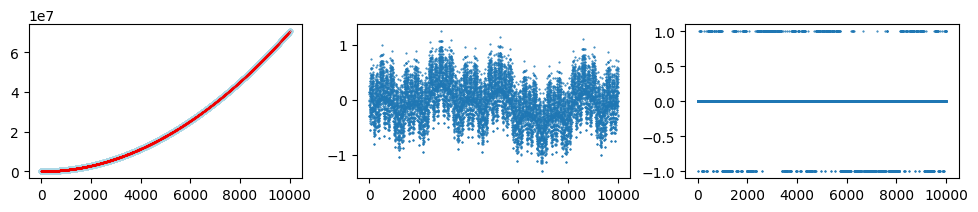

In [ ]:
import matplotlib.pyplot as plt
from math import floor, sqrt, ceil
from decimal import Decimal, ROUND_FLOOR
def observe(n):
    getcontext().prec = n*2  # Change the precision
    x, y = [], []
    z, diff = [], []
    z1, diff1 = [], []
    prev, sqrt_two = 0, Decimal(2).sqrt()
    for i in range(n):
        i_ = Decimal(i)
        x.append(i)
        curr = int( prev + floor(i_*sqrt_two) )
        y.append(curr)
        prev = curr

        curr_z = (1+i_)*i_/2*sqrt_two - i_*Decimal(0.5)
        z.append(curr_z)
        diff.append(curr_z - curr)

        curr_z1 = round( (1+i_)*i_/2*sqrt_two - i_*Decimal(0.5) )
        diff1.append(curr_z1 - curr)

    plt.figure(figsize=(12, 2))
    plt.subplot(1,3,1); plt.plot(x, y, '.', c='lightblue'); plt.plot(x, z, '.', ms=0.1, c='r')
    plt.subplot(1,3,2); plt.plot(x, diff, '.', ms=1)
    plt.subplot(1,3,3); plt.plot(x, diff1, '.', ms=1)
observe(10000)

In [ ]:
%%time
from math import floor, sqrt
from decimal import Decimal, ROUND_FLOOR, ROUND_HALF_UP
n = 10**5
getcontext().prec = n*2  # Change the precision
s, n_, sqrt_two = Decimal(0), Decimal(n), Decimal(2).sqrt()
for i in range(n):
    s += (Decimal(i)*sqrt_two).to_integral_exact(rounding=ROUND_FLOOR)
s_1 = ((1+n_)*n_/Decimal(2)*sqrt_two - n_*Decimal(0.5)).to_integral_exact(rounding=ROUND_FLOOR)
s_2 = (s_1 - (sqrt_two * n_).to_integral_exact(rounding=ROUND_FLOOR))
print(s, s_1, s_2)
## n = 10**10
## 70710678106583695135 70710678120725823488, delta = 14142128353
## CPU times: user 52min 2s, sys: 4.38 s, total: 52min 6s
## Wall time: 52min 32s
## n = 10**5
## 7070947101 7071088522, delta = 141421
## CPU times: user 18.1 s, sys: 47.9 ms, total: 18.1 s
## Wall time: 18.6 s

7070947101 7071088522 7070947101
CPU times: user 17.6 s, sys: 33.7 ms, total: 17.6 s
Wall time: 17.9 s


In [ ]:
(sqrt_two * n_).to_integral_exact(rounding=ROUND_FLOOR)

Decimal('141421')

In [ ]:
from math import floor, sqrt
from decimal import *
getcontext().prec = 200  # Change the precision
n = Decimal(10**10)
sqrt_two = Decimal(2).sqrt()
print(round(sqrt_two, 40))
print(floor(sqrt_two*n))
print(round((1+n)*n/2*sqrt_two - n*Decimal(0.5)))
print(round(((1+n)*n/2-n)*sqrt_two - n*Decimal(0.5)))

1.4142135623730950488016887242096980785697
14142135623
70710678120725820252
70710678106583684628


9999

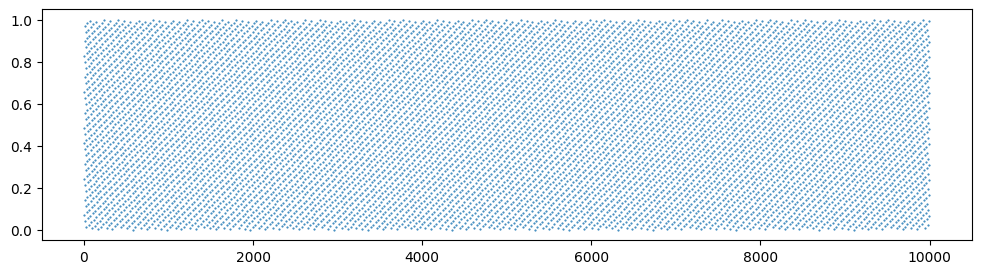

In [ ]:
import matplotlib.pyplot as plt
from math import sqrt, floor
x, y = [], []
sqrt_two = sqrt(2)
for i in range(1, 10000):
    x.append(i)
    y.append(i*sqrt_two - floor(i*sqrt_two))
plt.figure(figsize=(12, 3))
plt.plot(x, y, '.', ms=1);
len(set(y))

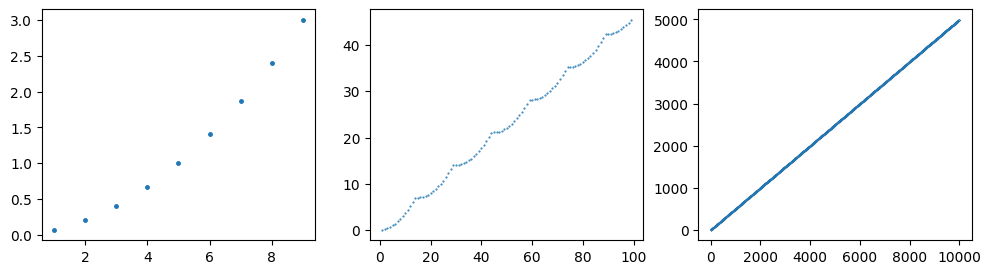

In [ ]:
import matplotlib.pyplot as plt
from math import sqrt, floor
def diff(n=10000):
    x, y = [], []
    prev, root = 0, sqrt(6) ## it deosn't matter it is 2, 3, 5, 6, etc. it always adds to around 0.5.
    root = 3**(1/17)
    for i in range(1, n):
        x.append(i)
        curr = prev + i*root - floor(i*root)
        y.append(curr)
        prev = curr
    return x, y
plt.figure(figsize=(12, 3))
x,y = diff(10); plt.subplot(1,3,1); plt.plot(x, y, '.', ms=5);
x,y = diff(100); plt.subplot(1,3,2); plt.plot(x, y, '.', ms=1);
x,y = diff(); plt.subplot(1,3,3); plt.plot(x, y, '.', ms=0.1);

[1, 2, 4, 5, 7, 8, 9, 11, 12, 14, 15, 16, 18, 19, 21, 22, 24, 25, 26, 28, 29, 31, 32, 33, 35, 36, 38, 39, 41, 42, 43, 45, 46, 48, 49, 50, 52, 53, 55, 56, 57, 59, 60, 62, 63, 65, 66, 67, 69, 70, 72, 73, 74, 76, 77, 79, 80, 82, 83, 84, 86, 87, 89, 90, 91, 93, 94, 96, 97, 98, 100, 101, 103, 104, 106, 107, 108, 110, 111, 113, 114, 115, 117, 118, 120, 121, 123, 124, 125, 127, 128, 130, 131, 132, 134, 135, 137, 138, 140]
[1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2]
average: 1.4141414141414141


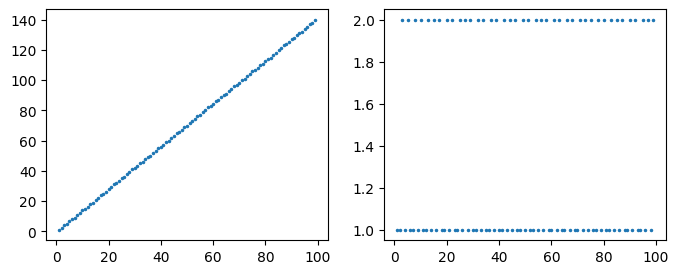

In [ ]:
import matplotlib.pyplot as plt
from decimal import getcontext, Decimal, ROUND_FLOOR
n = 100
getcontext().prec = n*2  # Change the precision
n_1 = Decimal(n)
sqrt_two = Decimal(2).sqrt()
x, y, z = [0], [0], []
for i in range(1, n):
    x.append(i)
    y.append((Decimal(i)*sqrt_two).to_integral_exact(rounding=ROUND_FLOOR))
    z.append(int(y[-1]-y[-2]))
plt.figure(figsize=(8, 3))
plt.subplot(1,2,1); plt.plot(x[1:], y[1:], '.', ms=3);
plt.subplot(1,2,2); plt.plot(x[1:], z, '.', ms=3);
print([int(val) for val in y[1:]])
print([int(val) for val in z])
print("average:", sum(z)/len(z))
# .41421356237309

Imagine a line drawn from (n, n\*$\sqrt2$) to (m, m\*$\sqrt2$) with m>n
. Between each time this passes through a vertical line, it passes through **either 1 or 2 horizontal lines**. These 1s and 2s are exactly the sequence of differences of terms we defined above at indices n through m. (go to [the solution](https://math.stackexchange.com/a/2097910/1183417))   

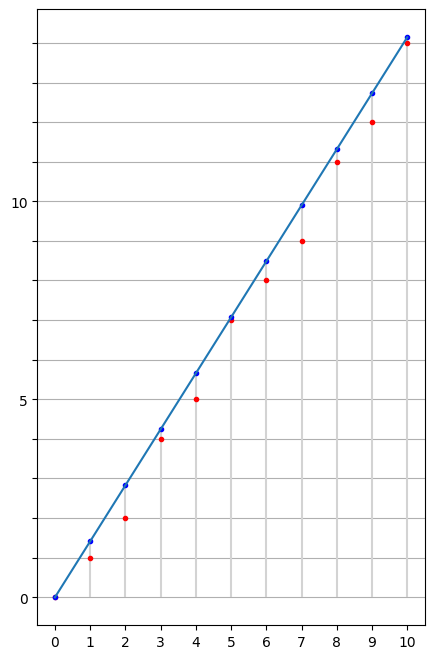

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt, floor
from decimal import getcontext, Decimal, ROUND_FLOOR

n = 11
getcontext().prec = n*2  # Change the precision
n_1 = Decimal(n)
sqrt_two = Decimal(2).sqrt()
x, y, z = [0], [0], [0]
for i in range(1, n):
    x.append(i)
    y.append((Decimal(i)*sqrt_two).to_integral_exact(rounding=ROUND_FLOOR)) ## floor(i*sqrt(2))
    z.append((Decimal(i)*sqrt_two)) ## i*sqrt(2)

fig, ax = plt.subplots(figsize=(5,8))
plt.vlines(x=x, ymin=0, ymax=z, colors='lightgrey') ## grey vertical lines
ax.plot(x, y, '.r') ## red dots
ax.plot(x, z, '.b') ## blue lines
ax.plot(x, z)
plt.xticks(np.arange(0, 11, 1))
plt.yticks(np.arange(0, 15, 1))
y_tick_labels = [label.get_text() for label in ax.get_yticklabels()]
ax.set_yticklabels([t if int(t)%5==0 else '' for t in y_tick_labels])
ax.grid(axis='y')
plt.show()

In [ ]:
%%time
from decimal import getcontext, Decimal
getcontext().prec = 200  # Change the precision
sqrt_two = Decimal(2).sqrt()
## OverflowError: Python int too large to convert to C ssize_t

CPU times: user 1.27 ms, sys: 0 ns, total: 1.27 ms
Wall time: 10.3 ms


https://math.stackexchange.com/questions/389063/how-to-represent-the-floor-function-using-mathematical-notation  
https://mpmath.org/doc/current/functions/index.html  
https://math.stackexchange.com/questions/3014473/sum-of-n-sqrt2  
https://math.stackexchange.com/questions/2096603/how-to-evaluate-this-sum-sum-limits-i-1n-left-lfloor-sqrt2-cdot-i  
https://math.stackexchange.com/questions/2052179/how-to-find-sum-i-1n-left-lfloor-i-sqrt2-right-rfloor-a001951-a-beatty-s
https://mathworld.wolfram.com/BeattySequence.html  

youtube: [Rethinking the real line #SoME3](https://www.youtube.com/watch?v=uFWJuZQLKJs)  

In [ ]:
from mpmath import mp
mp.dps = 101 ## precision
mp.cos(0.1)
# print(Decimal(mp.cos(0.1))) ## TypeError: conversion from mpf to Decimal is not suported

mpf('0.99500416527802576554137519886234525634808008351527726792462543996274496364390153731420823650932189502544')

In [ ]:
from mpmath import mp
mp.dps = 101 ## precision
print(mp.pi)
print(mp.cot(mp.pi/3))
print(mp.sqrt(2))
print(mp.atan(1))

3.141592653589793238462643383279502884197169399375105820974944592307816406286208998628034825342117068
0.57735026918962576450914878050195745564760175127012687601860232648397767230293334569371539558574952522
1.4142135623730950488016887242096980785696718753769480731766797379907324784621070388503875343276415727
0.785398163397448309615660845819875721049292349843776455243736148076954101571552249657008706335529267


In [ ]:
## floor funcion in trigonometry
from mpmath import mp
mp.dps = 100 ## precision
def my_floor(x):
    return round(x-0.5-mp.atan(mp.cot(mp.pi*(x-0.5)))/mp.pi)
l = []
for i in range(1, 31):
    l.append(my_floor(i+0.7))
print(l)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


In [ ]:
from mpmath import mp
mp.dps = 120 ## precision
def solution(s):
    n = int(s)
    sqrt_two = mp.sqrt(2) - 0.5
    return round((1+n)*n/2*(sqrt_two-mp.atan(mp.cot(mp.pi*sqrt_two))/mp.pi))
print(solution('5')) ## 19
print(solution('77')) ## 4208
print(solution('100000')) ## 7070947101

20
3989
6642202045


https://oeis.org/A001951  

In [ ]:
from sympy import integer_nthroot
def A001951(n):
    return integer_nthroot(2*n**2, 2)[0]
l = []
for i in range(1, 41):
    l.append(A001951(i))
print(l)

[1, 2, 4, 5, 7, 8, 9, 11, 12, 14, 15, 16, 18, 19, 21, 22, 24, 25, 26, 28, 29, 31, 32, 33, 35, 36, 38, 39, 41, 42, 43, 45, 46, 48, 49, 50, 52, 53, 55, 56]


https://math.stackexchange.com/questions/2096603/how-to-evaluate-this-sum-sum-limits-i-1n-left-lfloor-sqrt2-cdot-i  

In [ ]:
import math
import time

def cmp(x, y):
    return (x > y) - (x < y)

## Helpers for numbers in the form [a + b*sqrt(2)], encoded as a tuple (a, b)
## compare 2 numbers
def root2_cmp(x, y):
    x_a, x_b = x
    y_a, y_b = y

    a = x_a - y_a
    b = x_b - y_b

    a_sign = cmp(a, 0)
    b_sign = cmp(b, 0)

    if a_sign == b_sign: return a_sign
    if a_sign == 0: return b_sign
    if b_sign == 0: return a_sign

    # one of a_sign and b_sign is 1 and the other is -1
    # compare a^2 and (b*sqrt(2))^2 = 2*b^2
    aa = a*a
    bb2 = b*b*2

    # if a^2 > 2b^2, return a_sign otherwise the opposite sign
    return cmp(aa, bb2) * a_sign

def root2_max(x,y):
    return x if root2_cmp(x,y) > 0 else y

def root2_min(x,y):
    return x if root2_cmp(x,y) < 0 else y

def root2_add(x,y):
    return tuple(x_i+y_i for x_i,y_i in zip(x,y))

def root2_sub(x,y):
    return tuple(x_i-y_i for x_i,y_i in zip(x,y))

# Takes 2 sequence objects in the form (lower_bound, upper_bound, offset, sequence_data)
# Returns the same data for the concatenation of the sequences.

def seq_concat(a, b):
    a_lower, a_upper, a_offset, a_seq_data = a
    b_lower, b_upper, b_offset, b_seq_data = b

    c_lower = root2_max(a_lower, root2_sub(b_lower, a_offset))
    c_upper = root2_min(a_upper, root2_sub(b_upper, a_offset))

    # sanity check - should never be concatenating sequences that can't go together
    assert root2_cmp(c_upper, c_lower) > 0

    c_offset = root2_add(a_offset, b_offset)
    c_sequence = seq_data_concat(a_seq_data, b_seq_data)

    return c_lower, c_upper, c_offset, c_sequence

# Takes 2 sequence data objects in the form (length, slope, y-intercept)
# Returns the same data for the concatenation of the sequences.
def seq_data_concat(a,b):
    a_len, a_slope, a_intercept = a
    b_len, b_slope, b_intercept = b

    c_len = a_len + b_len
    c_slope = a_slope + b_slope
    c_intercept = a_slope*b_len + a_intercept + b_intercept

    return (c_len, c_slope, c_intercept)

# Compute the sum for i from 1 to n of floor(i*sqrt(2))
def root2_floor_sum(n):
    ## lower, upper, offset, seq_data (length, slope, y-intercept)
    seqs = [( (0,0), (2,-1), (-1,1), (1,1,1) ),
            ( (2,-1), (1,0), (-2,1), (1,2,2) )]

    prev_seq = None
    cur_seq_data = (0,0,0)
    cur_offset = (0,0)

    ## while the current sequence length is below n
    while cur_seq_data[0] < n:
        ## remove sequences that are too big
        max_len = n - cur_seq_data[0]
        # seqs = filter(lambda lb,ub,off,seq_data: seq_data[0]<=max_len, seqs) ;print(list(seqs))
        seqs_1 = []
        for lb,ub,off,seq_data in seqs:
            if seq_data[0]<=max_len:
                seqs_1.append((lb,ub,off,seq_data))
        # matching_seqs = filter(lambda lb,ub,off,seq_data: root2_cmp(cur_offset, lb)>=0 and root2_cmp(cur_offset, ub)<0, seqs)
        matching_seqs = []
        for lb,ub,off,seq_data in seqs_1:
            if root2_cmp(cur_offset, lb)>=0 and root2_cmp(cur_offset, ub)<0:
                matching_seqs.append((lb,ub,off,seq_data))
        # next_seq = max(matching_seqs, key=lambda lb,ub,off,seq_data: seq_data[0])
        next_seq = max(matching_seqs, key=lambda x: x[3][0])

        if prev_seq:
            seq_to_add = seq_concat(prev_seq, next_seq)
            seqs.append(seq_to_add)

        next_lb, next_ub, next_off, next_seq_data = next_seq
        cur_seq_data = seq_data_concat(cur_seq_data, next_seq_data)
        cur_offset = root2_add(cur_offset, next_off)
        prev_seq = next_seq

    return cur_seq_data[2]

## verify the algorithm works for small n
def verify_up_to(n):
    expected = 0
    root2 = math.sqrt(2)
    for i in range(1,n+1):
        expected += int(math.floor(root2*i))
        assert root2_floor_sum(i) == expected
verify_up_to(1000)

start_time = time.time()
result = root2_floor_sum(10**100)
end_time = time.time()

print(result)
print('computed in', int((end_time - start_time)*1000), 'ms')

70710678118654752440084436210484903928483593768847403658833986899536623923105351942519376716382078638821760123411090095254685423841027253480565451739737157454059823250037671948325191776995310741236436
computed in 899 ms


In [ ]:
## code explained: filter
long_strings = filter(lambda x: len(x)>5, ["a", "b", "c", "d12345", "e"])
print(list(long_strings))

['d12345']


In [ ]:
## passed all the tests
def solution(s):
    import math

    def cmp(x, y):
        return (x > y) - (x < y)

    ## Helpers for numbers in the form [a + b*sqrt(2)], encoded as a tuple (a, b)
    ## compare 2 numbers
    def root2_cmp(x, y):
        x_a, x_b = x
        y_a, y_b = y

        a = x_a - y_a
        b = x_b - y_b

        a_sign = cmp(a, 0)
        b_sign = cmp(b, 0)

        if a_sign==b_sign: return a_sign
        if a_sign==0: return b_sign
        if b_sign==0: return a_sign

        ## one of a_sign and b_sign is 1 and the other is -1
        ## compare a^2 and (b*sqrt(2))^2 = 2*b^2
        aa = a*a
        bb2 = b*b*2

        ## if a^2 > 2b^2, return a_sign otherwise the opposite sign
        return cmp(aa, bb2) * a_sign

    def root2_max(x, y):
        return x if root2_cmp(x,y) > 0 else y

    def root2_min(x, y):
        return x if root2_cmp(x,y) < 0 else y

    def root2_add(x, y):
        return tuple(x_i+y_i for x_i,y_i in zip(x,y))

    def root2_sub(x, y):
        return tuple(x_i-y_i for x_i,y_i in zip(x,y))

    ## Takes 2 sequence objects in the form (lower_bound, upper_bound, offset, sequence_data)
    ## Returns the same data for the concatenation of the sequences.
    def seq_concat(a, b):
        a_lower, a_upper, a_offset, a_seq_data = a
        b_lower, b_upper, b_offset, b_seq_data = b

        c_lower = root2_max(a_lower, root2_sub(b_lower, a_offset))
        c_upper = root2_min(a_upper, root2_sub(b_upper, a_offset))

        ## sanity check - should never be concatenating sequences that can't go together
        assert root2_cmp(c_upper, c_lower) > 0

        c_offset = root2_add(a_offset, b_offset)
        c_sequence = seq_data_concat(a_seq_data, b_seq_data)

        return c_lower, c_upper, c_offset, c_sequence

    ## Takes 2 sequence data objects in the form (length, slope, y-intercept)
    ## Returns the same data for the concatenation of the sequences.
    def seq_data_concat(a,b):
        a_len, a_slope, a_intercept = a
        b_len, b_slope, b_intercept = b

        c_len = a_len + b_len
        c_slope = a_slope + b_slope
        c_intercept = a_slope*b_len + a_intercept + b_intercept

        return (c_len, c_slope, c_intercept)

    ## Compute the sum for i from 1 to n of floor(i*sqrt(2))
    def root2_floor_sum(n):
        ## lower, upper, offset, seq_data (length, slope, y-intercept)
        seqs = [( (0,0), (2,-1), (-1,1), (1,1,1) ),
                ( (2,-1), (1,0), (-2,1), (1,2,2) )]

        prev_seq = None
        cur_seq_data = (0,0,0)
        cur_offset = (0,0)

        ## while the current sequence length is below n
        while cur_seq_data[0] < n:
            ## remove sequences that are too big
            max_len = n - cur_seq_data[0]
            seqs_1 = []
            for lb,ub,off,seq_data in seqs:
                if seq_data[0]<=max_len:
                    seqs_1.append((lb,ub,off,seq_data))

            matching_seqs = []
            for lb,ub,off,seq_data in seqs_1:
                if root2_cmp(cur_offset, lb)>=0 and root2_cmp(cur_offset, ub)<0:
                    matching_seqs.append((lb,ub,off,seq_data))

            next_seq = max(matching_seqs, key=lambda x: x[3][0])

            if prev_seq:
                seq_to_add = seq_concat(prev_seq, next_seq)
                seqs.append(seq_to_add)

            next_lb, next_ub, next_off, next_seq_data = next_seq
            cur_seq_data = seq_data_concat(cur_seq_data, next_seq_data)
            cur_offset = root2_add(cur_offset, next_off)
            prev_seq = next_seq

        return cur_seq_data[2]

    n = int(s)
    return str(root2_floor_sum(n))

In [ ]:
print(solution('5')) ## 19
print(solution('77')) ## 4208
print(solution('100000')) ## 7070947101, 7071088522?

19
4208
7071088522


# **🟢 challenges completed**  
https://twitter.com/WenjingLiu7/status/1722206490986205404  

```
Submission: SUCCESSFUL. Completed in: 20 days, 17 hrs, 39 mins, 58 secs..
      /@                                            /@                                          /@
     @~/@       @@                                 @~/@       @@                               @~/@       @@
    @~~/ %     @$%@                               @~~/ %     @$%@                             @~~/ %     @$%@
    @~(((((% %/////@                              @~(((((% %/////@                            @~(((((% %/////@
    @((/////@~//~~@                               @((/////@~//~~@                              @((/////@~//~~@
    @(/// @//////@                                @(/// @//////@                               @(/// @//////@
      @//% @~~~/~@                                  @//% @~~~/~@                                 @//% @~~~/~@
     /@$$$ @///~~/@                                /@$$$ @///~~/@                               /@$$$ @///~~/@
    @        ////@@                               @        ////@@                              @        ////@@
   @$   //@@@((/~ @                              @$   //@@@((/~ @                             @$   //@@@((/~ @
  @$  //@    @  ((///@                         @$  //@    @  ((///@                         @$  //@    @  ((///@
 @$      (@@@  ((((//%%@                       @$      (@@@  ((((//%%@                      @$      (@@@  ((((//%%@
 @                 ((//                        @                 ((//                       @                 ((//
   @ ~        (((((((((  /%//////@@     //@      @ ~        (((((((((  /%//////@@     //@     @ ~        (((((((((  /%//////@@     //@
     @~                 %  ~~~~~~~~/   /@$         @~                 %  ~~~~~~~~/   /@$        @~                 %  ~~~~~~~~/   /@$
         @@/$             ~~~~~////////$               @@/$             ~~~~~////////$              @@/$             ~~~~~////////$
           //@@@%%/~~      ~~~~~~~~~~///@                //@@@%%/~~      ~~~~~~~~~~///@               //@@@%%/~~      ~~~~~~~~~~///@
            ~~~          ~~~~~~~//////@$@@                ~~~          ~~~~~~~//////@$@@               ~~~          ~~~~~~~//////@$@@
        $$$                   ~~~~((((///////@        $$$                   ~~~~((((///////@       $$$                   ~~~~((((///////@
      $~~~~ %%%   /         ~~~~(////////(($@       $~~~~ %%%   /         ~~~~(////////(($@      $~~~~ %%%   /         ~~~~(////////(($@
     @$$~~ @   $$/            ~~~~((((((%%%@       @$$~~ @   $$/            ~~~~((((((%%%@      @$$~~ @   $$/            ~~~~((((((%%%@
     \\@@@@                   (((((((%%%%%@        \\@@@@                   (((((((%%%%%@       \\@@@@                   (((((((%%%%%@
                              $$$$$$$$$@                                    $$$$$$$$$@                                   $$$$$$$$$@
                            $$$%%%%%%@                                    $$$%%%%%%@                                  $$$%%%%%%@
                          $$%%%%%%%%@                                   $$%%%%%%%%@                                  $$%%%%%%%%@
                   @ ///   $$%%%%%%@                             @ ///   $$%%%%%%@                            @ ///   $$%%%%%%@
                 @////        @@@@@                            @////        @@@@@                           @////        @@@@@
                   @////@@@@@@@@@                                @////@@@@@@@@@                              @////@@@@@@@@@

<encrypted>b'F04GAgYNDxodQA5eQVMGAQYIEUlPRUsKGhsJCwsOGwIJRFtURhYQHQALDgAITllXQgsMDwEVWhdG\nVFtTRAALDREACAAXGwBJRklJBk0MCBEXFg4MCxpERVZJUgILAgUKBQJKQ01URgECCwcHFxZLSU9X\nQh0LDwtAAkRGEg4cRElfTkQSBQdUUBg='</encrypted>  
For your eyes only!  
Use the status command to repeat this message.  

You've completed all the challenges!  
If you'd like to know when more challenges are added, let us know your email address below.
We will use your information in accordance with Google's Privacy Policy.
[#1] Would you like to be notified when a new set of challenges are available to play?
[Y]es [N]o:
Check back later for new challenges. Use feedback to share your thoughts with us.
```

https://patataeater.blogspot.com/2020/08/how-to-get-hired-by-google.html  

In [ ]:
encrypted_bytes = b'F04GAgYNDxodQA5eQVMGAQYIEUlPRUsKGhsJCwsOGwIJRFtURhYQHQALDgAITllXQgsMDwEVWhdG\nVFtTRAALDREACAAXGwBJRklJBk0MCBEXFg4MCxpERVZJUgILAgUKBQJKQ01URgECCwcHFxZLSU9X\nQh0LDwtAAkRGEg4cRElfTkQSBQdUUBg='

import base64
decoded_bytes = base64.b64decode(encrypted_bytes)
print(decoded_bytes)
print(decoded_bytes.decode()) ## default is 'utf-8'
print(str.encode("MY USER NAME"))
print()

## hint: for your eyes only
in_my_eyes = str.encode("liuwenjing.datascience")
len_in_my_eyes = len(in_my_eyes)
decrypted_chars = ''
for i,byte in enumerate(decoded_bytes):
    decrypted_chars += chr((in_my_eyes[i%len_in_my_eyes] ^ byte)) ## ^ is bitwise xor, which is a good mask
print(decrypted_chars)

b'\x17N\x06\x02\x06\r\x0f\x1a\x1d@\x0e^AS\x06\x01\x06\x08\x11IOEK\n\x1a\x1b\t\x0b\x0b\x0e\x1b\x02\tD[TF\x16\x10\x1d\x00\x0b\x0e\x00\x08NYWB\x0b\x0c\x0f\x01\x15Z\x17FT[SD\x00\x0b\r\x11\x00\x08\x00\x17\x1b\x00IFII\x06M\x0c\x08\x11\x17\x16\x0e\x0c\x0b\x1aDEVIR\x02\x0b\x02\x05\n\x05\x02JCMTF\x01\x02\x0b\x07\x07\x17\x16KIOWB\x1d\x0b\x0f\x0b@\x02DF\x12\x0e\x1cDI_ND\x12\x05\x07TP\x18'
@^ASIOEK
   IFIIMDEVIR
JCMTFKIOWB@DFDI_NDTP
b'MY USER NAME'

{'success' : 'great', 'colleague' : 'esteemed', 'efforts' : 'incredible', 'achievement' : 'unlocked', 'rabbits' : 'safe', 'foo' : 'win!'}


# **6. disorderly-escape**  

* 22 days  

foobar:~/disorderly-escape ***$ cat readme.txt
Disorderly Escape
=================
Oh no! You've managed to free the bunny workers and escape Commander Lambdas exploding space station, but Lambda's team of elite starfighters has flanked your ship. If you dont jump to hyperspace, and fast, youll be shot out of the sky!

Problem is, to avoid detection by galactic law enforcement, Commander Lambda planted the space station in the middle of a quasar quantum flux field. In order to make the jump to hyperspace, you need to know the configuration of celestial bodies in the quadrant you plan to jump through. In order to do *that*, you need to figure out how many configurations each quadrant could possibly have, so that you can pick the optimal quadrant through which youll make your jump.

There's something important to note about quasar quantum flux fields' configurations: when drawn on a star grid, configurations are considered equivalent by grouping rather than by order. That is, for a given set of configurations, if you exchange the position of any two columns or any two rows some number of times, youll find that all of those configurations are equivalent in that way -- in grouping, rather than order.

Write a function **solution(w, h, s)** that takes 3 integers and returns the number of unique, non-equivalent configurations that can be found on a star grid w blocks wide and h blocks tall where each celestial body has s possible states. Equivalency is defined as above: any two star grids with each celestial body in the same state where the actual order of the rows and columns do not matter (and can thus be freely swapped around). Star grid standardization means that the width and height of the grid will always be **between 1 and 12**, inclusive. And while there are a variety of celestial bodies in each grid, the number of states of those bodies is **between 2 and 20**, inclusive. The solution can be **over 20 digits long**, so return it as a decimal string. The intermediate values can also be large, so you will likely need to use **at least 64-bit integers**.

For example, consider w=2, h=2, s=2. We have a 2x2 grid where each celestial body is either in state 0 (for instance, silent) or state 1 (for instance, noisy). We can examine which grids are equivalent by swapping rows and columns.
```
00
00
```
In the above configuration, all celestial bodies are "silent" - that is, they have a state of 0 - so any swap of row or column would keep it in the same state.
```
00 00 01 10
01 10 00 00
```
1 celestial body is emitting noise - that is, has a state of 1 - so swapping rows and columns can put it in any of the 4 positions. All four of the above configurations are equivalent.
```
00 11
11 00
```
2 celestial bodies are emitting noise side-by-side. Swapping columns leaves them unchanged, and swapping rows simply moves them between the top and bottom. In both, the *groupings* are the same: one row with two bodies in state 0, one row with two bodies in state 1, and two columns with one of each state.
```
01 10
01 10
```
2 noisy celestial bodies adjacent vertically. This is symmetric to the side-by-side case, but it is different because there's no way to transpose the grid.
```
01 10
10 01
```
2 noisy celestial bodies diagonally. Both have 2 rows and 2 columns that have one of each state, so they are equivalent to each other.
```
01 10 11 11
11 11 01 10
```
3 noisy celestial bodies, similar to the case where only one of four is noisy.
```
11
11
```
4 noisy celestial bodies.

There are 7 distinct, non-equivalent grids in total, so solution(2, 2, 2) would return 7.

```
-- Python cases --
Input:
solution.solution(2, 3, 4)
Output:
    430

Input:
solution.solution(2, 2, 2)
Output:
    7
```

https://stackoverflow.com/questions/61689832/disorderly-escape-google-foobar-2020-not-passing-test-cases  

In [ ]:
from math import factorial, gcd
from collections import Counter

def cycle_count(c, n):
    cc=factorial(n)
    for a, b in Counter(c).items():
        cc//=(a**b)*factorial(b)
    return cc

def cycle_partitions(n, i=1):
    yield [n]
    for i in range(i, n//2 + 1):
        for p in cycle_partitions(n-i, i):
            yield [i] + p

def solution(w, h, s):
    grid=0
    for cpw in cycle_partitions(w):
        for cph in cycle_partitions(h):
            m=cycle_count(cpw, w)*cycle_count(cph, h)
            grid+=m*(s**sum([sum([gcd(i, j) for i in cpw]) for j in cph]))

    return str(grid//(factorial(w)*factorial(h)))

print(solution(2,3,4))
print(solution(2,2,2))
print(solution(3,3,3))

430
7
738


In [ ]:
## passed all the tests
from collections import Counter
def solution(w, h, s):
    def factorial(n):
        fac = 1
        for i in range(2, n+1):
            fac *= i
        return fac

    def gcd(x, y):
        while y:
           x, y = y, x%y
        return abs(x)

    def cycle_count(c, n):
        cc = factorial(n)
        for a,b in Counter(c).items():
            cc //= (a**b)*factorial(b)
        return cc

    def cycle_partitions(n, i=1):
        yield [n]
        for i in range(i, n//2 + 1):
            for p in cycle_partitions(n-i, i):
                yield [i] + p
    grid=0
    for cpw in cycle_partitions(w):
        for cph in cycle_partitions(h):
            m = cycle_count(cpw, w)*cycle_count(cph, h)
            grid += m*(s**sum([sum([gcd(i, j) for i in cpw]) for j in cph]))
    return str(grid//(factorial(w)*factorial(h)))

print(solution(2,3,4))
print(solution(2,2,2))
print(solution(3,3,3))

430
7
738


# **irrelevant**  

* [Russia | Math Olympiad Question | You should know this trick!!](https://www.youtube.com/watch?v=Um53h6yq_6o)  
$$\begin{multline} \lim_{n \to ∞ }(1+\frac{1}{n})^n=e \;\;\approx 2.718 \end{multline}$$

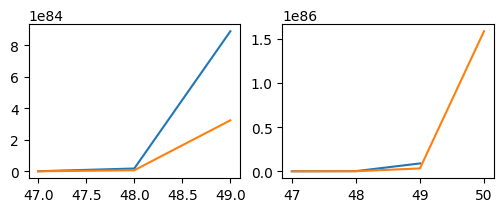

In [ ]:
import matplotlib.pyplot as plt
n0, n1 = 47, 50
x1, y1, x2, y2 = [], [], [], []
for i in range(n1):
    x1.append(i)
    if i==0: y1.append(50)
    else: y1.append(y1[-1] * 50)
for i in range(n1+1):
    x2.append(i)
    if i==0: y2.append(49)
    else: y2.append(y2[-1] * 49)
plt.figure(figsize=(6, 2))
plt.subplot(1,2,1); plt.plot(x1[n0:], y1[n0:], x2[n0:-1], y2[n0:-1])
plt.subplot(1,2,2); plt.plot(x1[n0:], y1[n0:], x2[n0:], y2[n0:]);

# **\<BOTTOM>**  